# Model vs Bet365 Probability Comparison

This scatter plot contrasts our model’s predicted probabilities against the implied probabilities from Bet365 odds for all GW14 fixtures.
Each marker represents an outcome type (home, draw, away), and the diagonal line shows perfect agreement.
Deviations from the line highlight differences between statistical modelling and bookmaker expectations, useful for identifying potential value bets or mismatched assessments.

**Model-generated match probabilities for All GW14 Fixtures**

Below are the predicted outcome probabilities produced by our model for all Gameweek 14 fixtures.
For each match, the model outputs the likelihood of a home win, draw, or away win.

| Fixture                       | Home Win | Draw   | Away Win |
|------------------------------|----------|--------|----------|
| Fulham vs Man City           | 0.259    | 0.421  | 0.320    |
| Bournemouth vs Everton       | 0.505    | 0.258  | 0.237    |
| Newcastle Utd vs Tottenham   | 0.481    | 0.129  | 0.391    |
| Brighton vs Aston Villa      | 0.390    | 0.367  | 0.242    |
| Burnley vs Crystal Palace    | 0.170    | 0.238  | 0.592    |
| Wolves vs Nott'ham Forest    | 0.206    | 0.244  | 0.550    |
| Arsenal vs Brentford         | 0.804    | 0.122  | 0.075    |
| Leeds Utd vs Chelsea         | 0.096    | 0.214  | 0.690    |
| Liverpool vs Sunderland      | 0.653    | 0.175  | 0.172    |
| Manchester Utd vs West Ham   | 0.746    | 0.149  | 0.106    |


**Bet365 Odds for All GW14 Fixtures**

The following image shows the Bet365 decimal odds for every Gameweek 14 match.
These odds are later converted into implied probabilities to allow comparison with our model predictions.

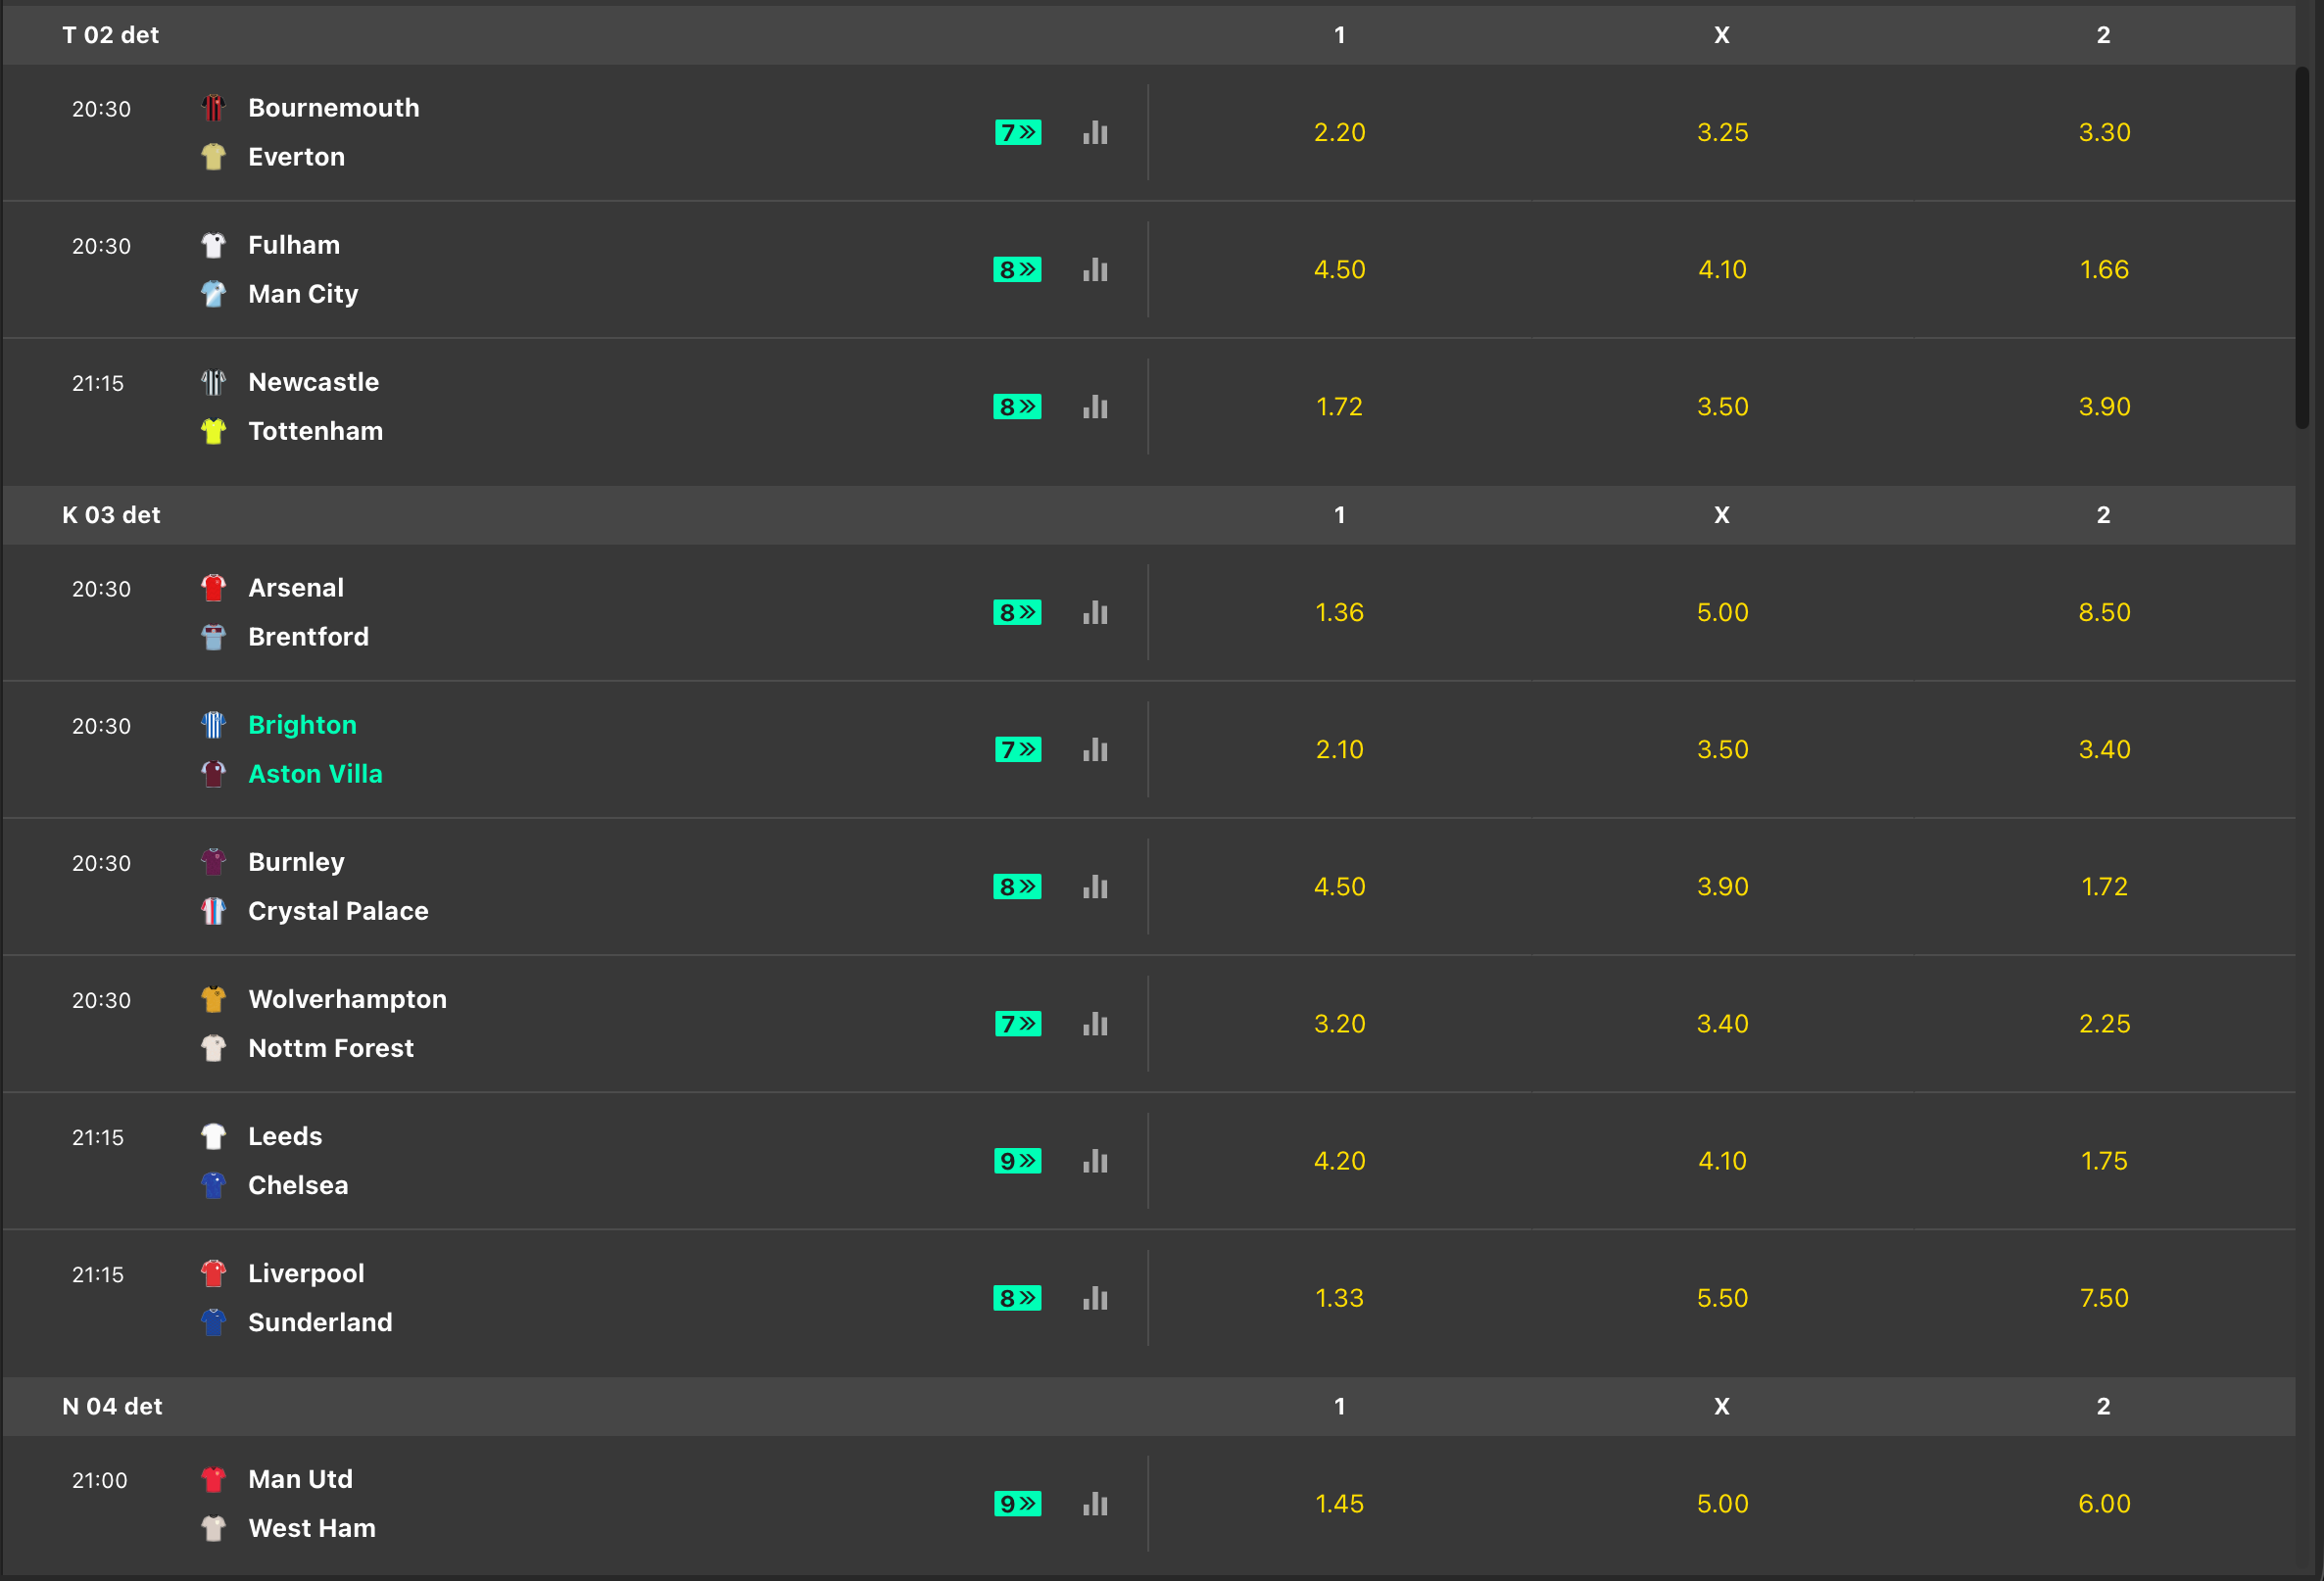

In [13]:
from IPython.display import Image
Image(filename='bet365odds.png')

**Combined Model and Bet365 Data for GW14 Fixtures**

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [30]:
data = pd.DataFrame({
    "fixture": [
        "Bournemouth–Everton",
        "Fulham–Manchester City",
        "Newcastle–Tottenham",
        "Arsenal–Brentford",
        "Brighton–Aston Villa",
        "Burnley–Crystal Palace",
        "Wolverhampton–Nottingham Forest",
        "Leeds–Chelsea",
        "Liverpool–Sunderland",
        "Manchester United–West Ham"
    ],
    "bet365_home_odds": [2.2, 4.5, 1.72, 1.36, 2.1, 4.5, 3.2, 4.2, 1.33, 1.45],
    "bet365_draw_odds": [3.25,4.1,3.5,5,3.5,3.9,3.4,4.1,5.5,5],
    "bet365_away_odds": [3.3,1.66,3.9,8.5,3.4,1.72,2.25,1.75,7.5,6],
    "model_home": [0.505, 0.259, 0.481,0.804,0.39,0.17,0.206,0.096,0.653,0.746],
    "model_draw": [0.258, 0.421, 0.129,0.122,0.367,0.238,0.244,0.214,0.175, 0.149],
    "model_away": [0.237, 0.32, 0.391,0.075, 0.242, 0.592, 0.55,0.69,0.172, 0.106],
})

**Converting odds to probabilities**

We convert Bet365’s decimal odds into implied probabilities using
implied probability = 1 / decimal odds,
so that the bookmaker’s estimates are expressed on the same probability scale as our model’s predictions. This allows both sets of values to be compared directly in the visualization.

In [33]:
data["bet_home"] = 1 / data["bet365_home_odds"]
data["bet_draw"] = 1 / data["bet365_draw_odds"]
data["bet_away"] = 1 / data["bet365_away_odds"]

**Model vs Bet365: Probability Comparison Scatter Plot**

This plot compares our model’s predicted probabilities with Bet365’s implied probabilities for all GW14 fixtures. Each point on the scatter plot corresponds to one predicted outcome for one match. 

- Green circles represent the probability of a Home Win.
- Yellow squares represent the probability of a Draw.
- Red triangles represent the probability of an Away Win.

For every fixture, the model produces three probabilities (home/draw/away), and Bet365 odds are converted into implied probabilities for comparison. 
- The diagonal line represents perfect agreement between our model and Bet365.
- Points below the line → our model predicts a lower probability than Bet365
- Points above the line → our model predicts a higher probability than Bet365

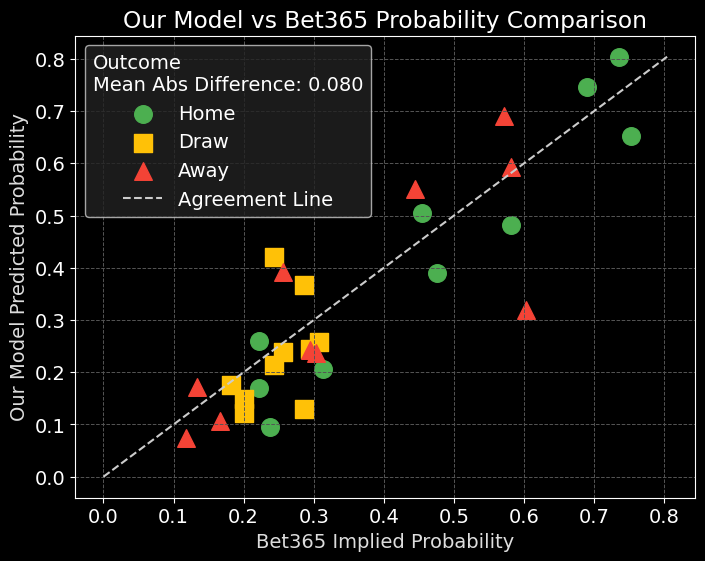

In [34]:
plt.style.use("dark_background")
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

# Scatter points
plt.scatter(data["bet_home"], data["model_home"], s=160, marker='o',
            label="Home", color="#4CAF50")
plt.scatter(data["bet_draw"], data["model_draw"], s=160, marker='s',
            label="Draw", color="#FFC107")
plt.scatter(data["bet_away"], data["model_away"], s=160, marker='^',
            label="Away", color="#F44336")

# Mean difference betweel model and bet365 odds
home_diff = np.mean(np.abs(data["model_home"] - data["bet_home"]))
draw_diff = np.mean(np.abs(data["model_draw"] - data["bet_draw"]))
away_diff = np.mean(np.abs(data["model_away"] - data["bet_away"]))
overall_diff = np.mean([home_diff, draw_diff, away_diff])

mad_label = f"Mean Abs Difference: {overall_diff:.3f}"

# Min–max for diagonal
min_val = 0
max_val = max(
    data["bet_home"].max(), data["model_home"].max(),
    data["bet_draw"].max(), data["model_draw"].max(),
    data["bet_away"].max(), data["model_away"].max()
)


# Agreement Line
plt.plot([min_val, max_val], [min_val, max_val],
         linestyle='--', linewidth=1.5, color="#CCCCCC", label="Agreement Line")

plt.xlabel("Bet365 Implied Probability", color="#DDDDDD")
plt.ylabel("Our Model Predicted Probability", color="#DDDDDD")
plt.title("Our Model vs Bet365 Probability Comparison", color="#FFFFFF")

plt.grid(True, linestyle='--', linewidth=0.7, color="#555555")

plt.legend(title=f"Outcome\n{mad_label}", facecolor="#222222")

plt.savefig("model_vs_bet365.png", format="png", dpi=300, bbox_inches="tight")
plt.show()